# House price prediction
---

- Author: Masud Rahman (masud90.github.io)
- Dataset: House Prices - Advanced Regression Techniques (competition on Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). The Ames Housing dataset was compiled by Dean De Cock for use in data science education. 

## Initialize setup

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

sns.set_style(style='whitegrid')

## Load dataset

In [5]:
dataset_df = pd.read_csv('train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


## EDA and pre-processing

In [7]:
# Drop the Id column as it is not necessary for model training
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [8]:
# Inspect the types of feature columns
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


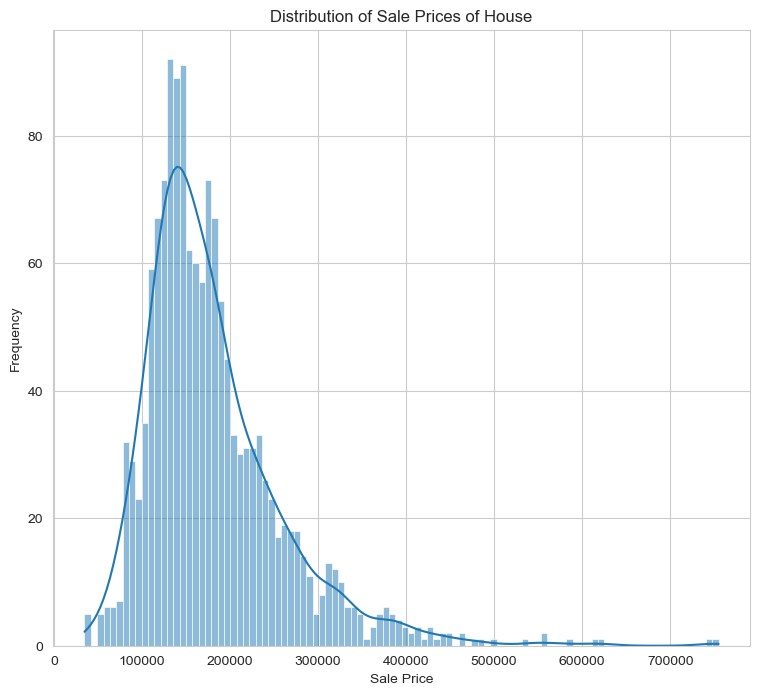

In [9]:
# House Price Distribution
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset_df['SalePrice'], bins=100, kde=True)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices of House')
plt.show()

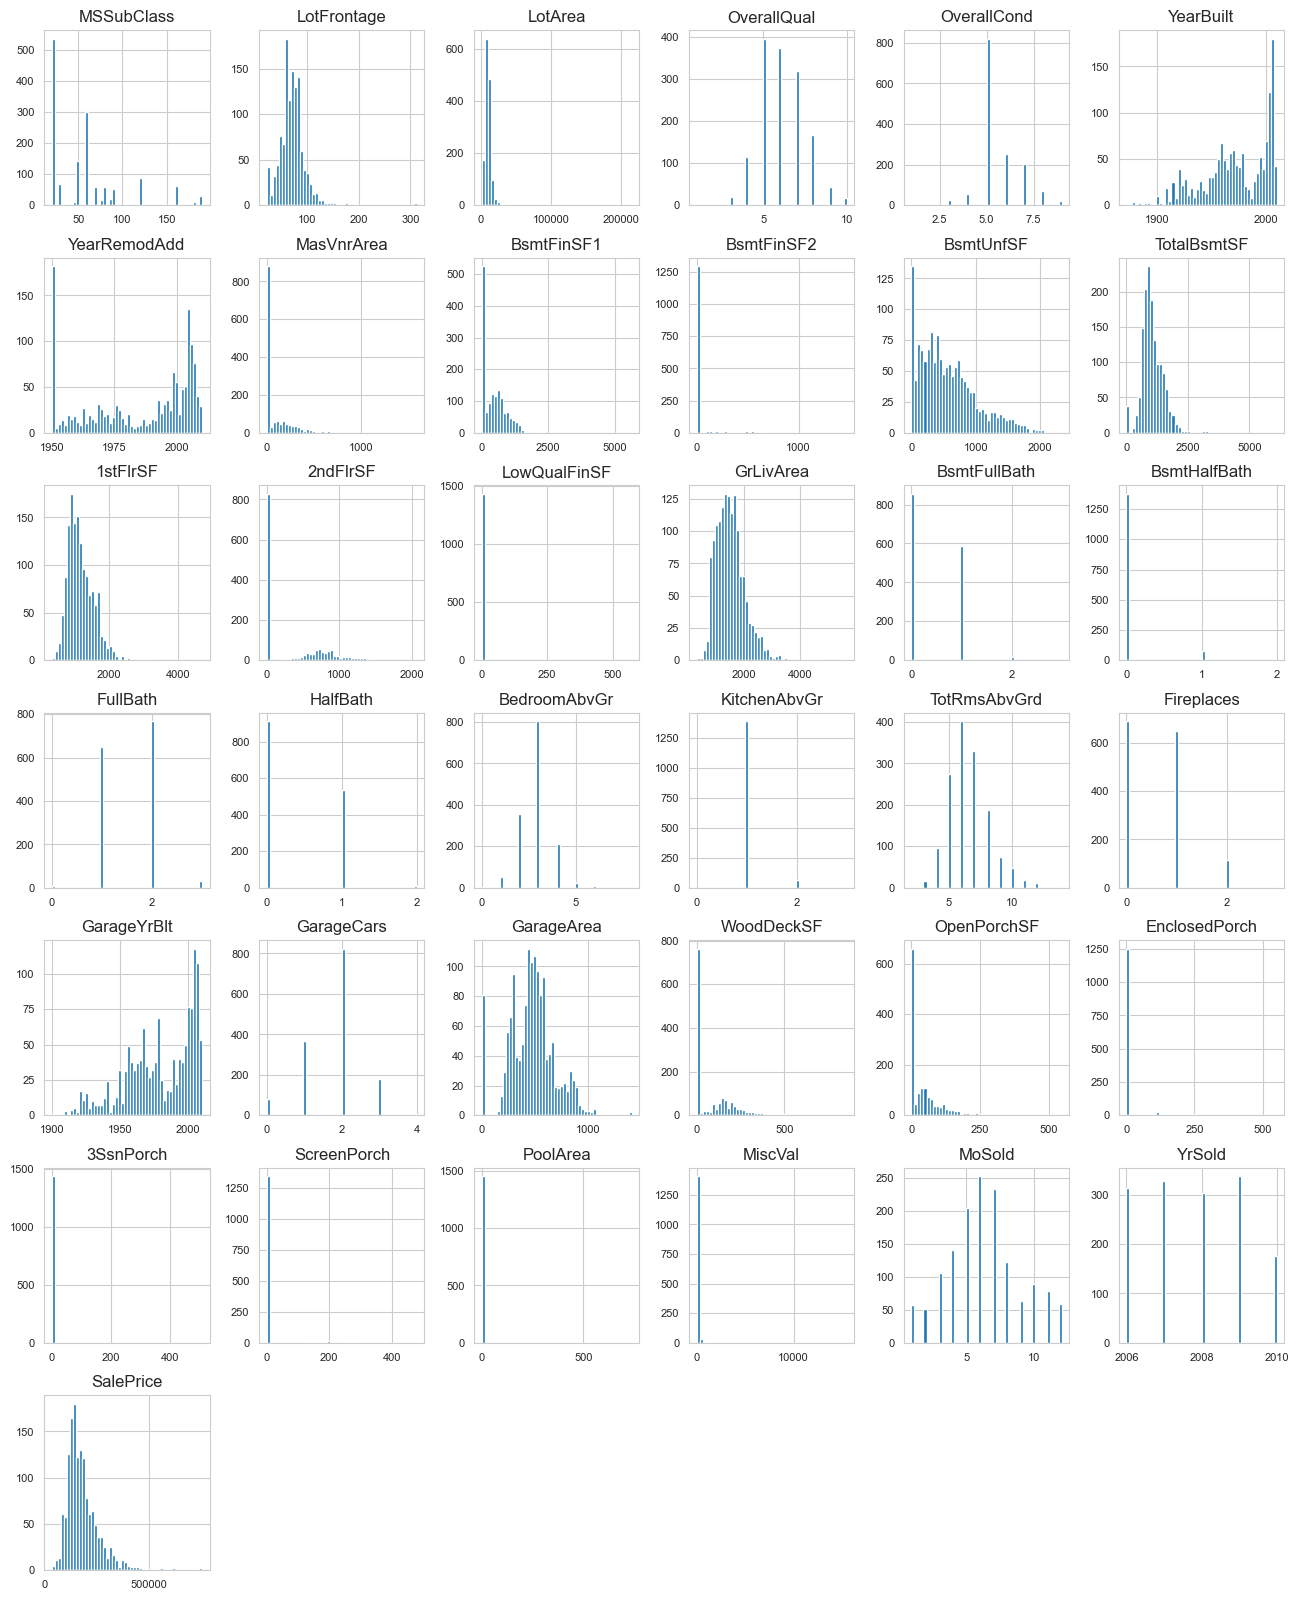

In [10]:
# Numerical data distribution
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

## Feature engineering

In [12]:
# Split the dataset into training and validation datasets
train_ds_pd, valid_ds_pd = train_test_split(dataset_df, test_size=0.30, random_state=42)
print("{} observations in training, {} observations in testing.".format(len(train_ds_pd), len(valid_ds_pd)))

1022 observations in training, 438 observations in testing.


In [13]:
# Convert categorical features into numerical features using one-hot encoding
train_ds_pd = pd.get_dummies(train_ds_pd)
valid_ds_pd = pd.get_dummies(valid_ds_pd)

In [14]:
# Ensure both training and validation datasets have the same dummy variables
train_ds_pd, valid_ds_pd = train_ds_pd.align(valid_ds_pd, join='left', axis=1, fill_value=0)

In [15]:
# Split features and labels
X_train = train_ds_pd.drop('SalePrice', axis=1)
y_train = train_ds_pd['SalePrice']
X_valid = valid_ds_pd.drop('SalePrice', axis=1)
y_valid = valid_ds_pd['SalePrice']

## Model training

In [17]:
# Create and train the Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model evaluation

In [19]:
# Evaluate the model
train_predictions = rf.predict(X_train)
valid_predictions = rf.predict(X_valid)

train_r2 = r2_score(y_train, train_predictions)
valid_r2 = r2_score(y_valid, valid_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_predictions))

print(f"Train R2: {train_r2}, Train RMSE: {train_rmse}")
print(f"Validation R2: {valid_r2}, Validation RMSE: {valid_rmse}")

Train R2: 0.975059460756544, Train RMSE: 12251.796506926948
Validation R2: 0.8950109744989178, Validation RMSE: 27067.01431292708


In [20]:
# Compute additional metrics on validation set
mae = mean_absolute_error(y_valid, valid_predictions)
mse = mean_squared_error(y_valid, valid_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, valid_predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 16880.151232876713
Mean Squared Error (MSE): 732623263.8161994
Root Mean Squared Error (RMSE): 27067.01431292708
R-squared (R²): 0.8950109744989178


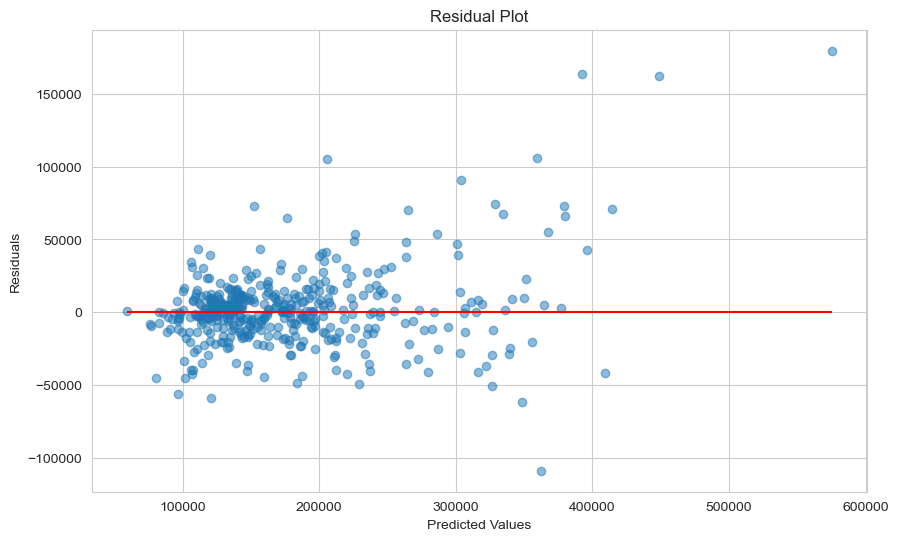

In [21]:
# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(valid_predictions, y_valid - valid_predictions, alpha=0.5)
plt.hlines(y=0, xmin=min(valid_predictions), xmax=max(valid_predictions), colors='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

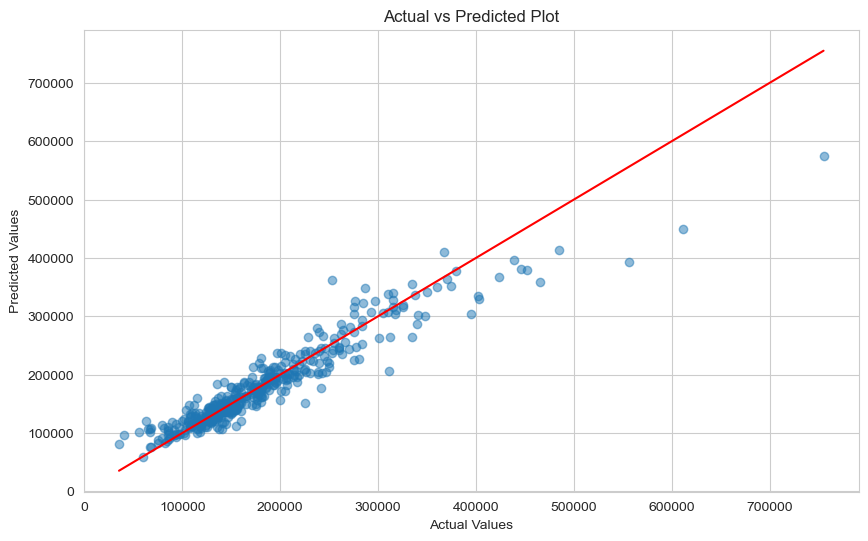

In [22]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, valid_predictions, alpha=0.5)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], 'r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Plot')
plt.show()

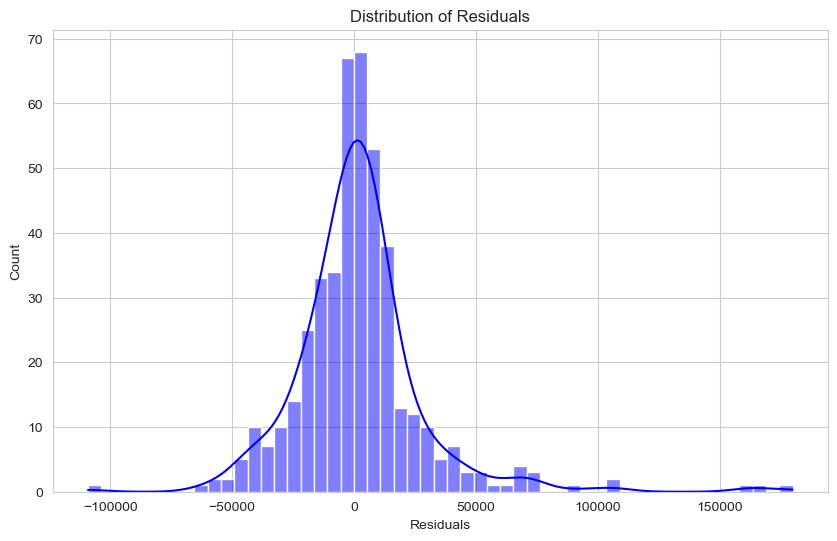

In [23]:
# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_valid - valid_predictions, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


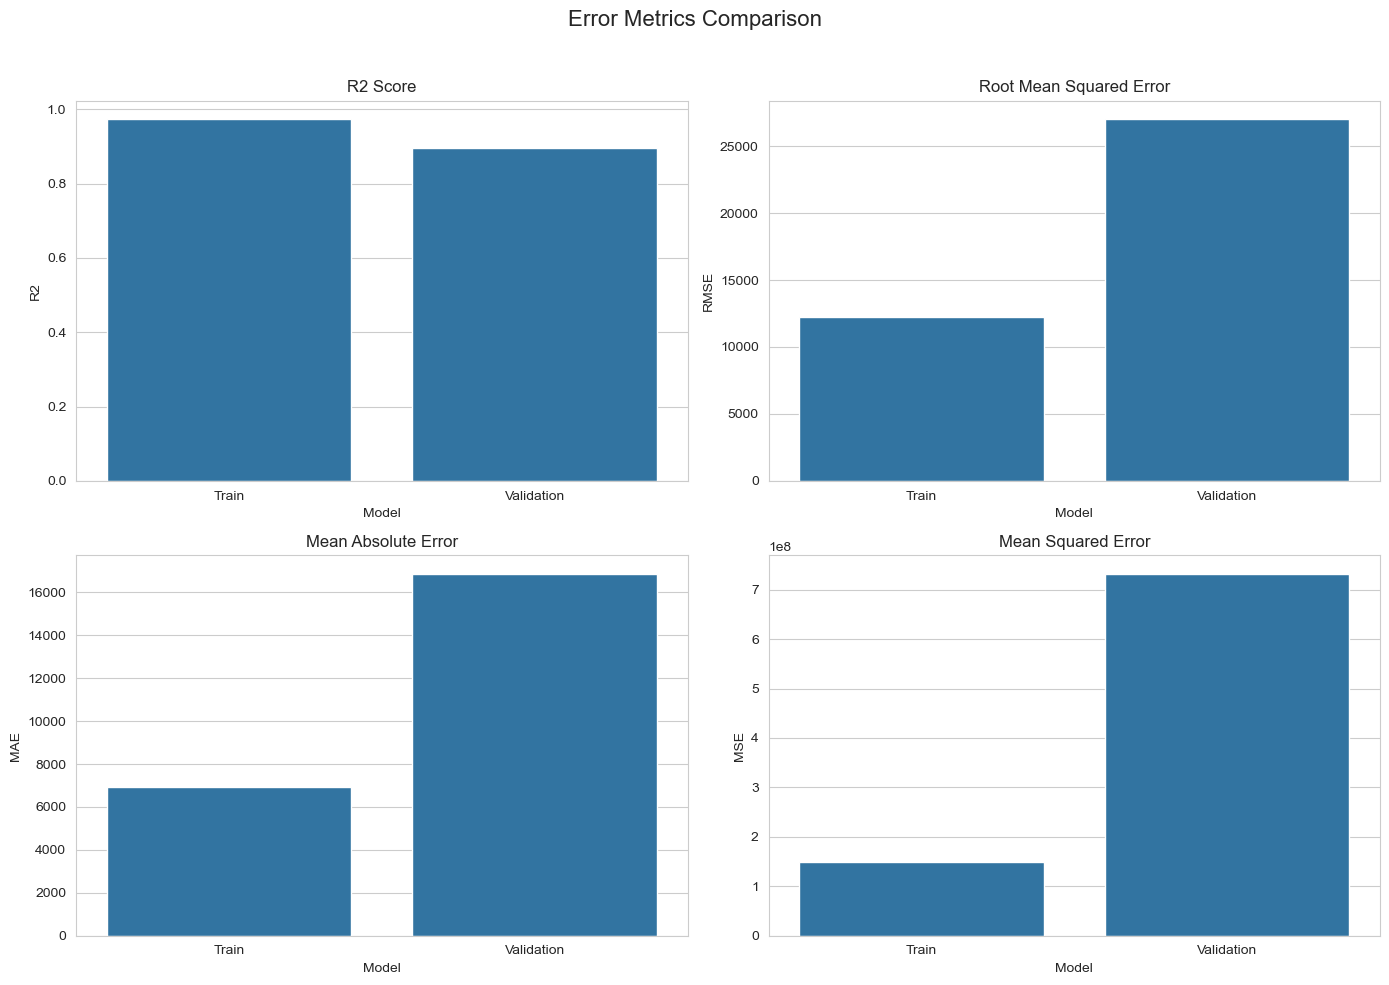

In [24]:
# Error Metrics Comparison Bar Plot
metrics = {
    'Model': ['Train', 'Validation'],
    'R2': [train_r2, valid_r2],
    'RMSE': [train_rmse, valid_rmse],
    'MAE': [mean_absolute_error(y_train, train_predictions), mean_absolute_error(y_valid, valid_predictions)],
    'MSE': [mean_squared_error(y_train, train_predictions), mean_squared_error(y_valid, valid_predictions)]
}
metrics_df = pd.DataFrame(metrics)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Error Metrics Comparison', fontsize=16)

sns.barplot(ax=axes[0, 0], x='Model', y='R2', data=metrics_df)
axes[0, 0].set_title('R2 Score')

sns.barplot(ax=axes[0, 1], x='Model', y='RMSE', data=metrics_df)
axes[0, 1].set_title('Root Mean Squared Error')

sns.barplot(ax=axes[1, 0], x='Model', y='MAE', data=metrics_df)
axes[1, 0].set_title('Mean Absolute Error')

sns.barplot(ax=axes[1, 1], x='Model', y='MSE', data=metrics_df)
axes[1, 1].set_title('Mean Squared Error')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

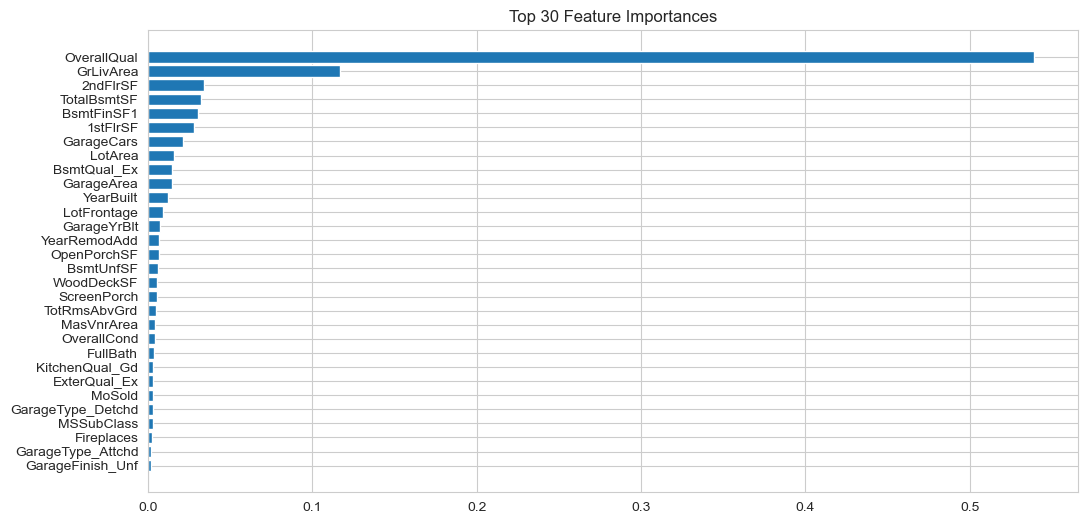

In [25]:
# Plot the top 30 variable importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:30]
names = [X_train.columns[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title("Top 30 Feature Importances")
plt.barh(range(30), importances[indices])
plt.yticks(range(30), names, rotation=0)
plt.gca().invert_yaxis()
plt.show()

## Prediction on test data

In [27]:
# Submission
test_data = pd.read_csv('test.csv')
ids = test_data.pop('Id')
print("Full test dataset shape is {}".format(test_data.shape))

Full test dataset shape is (1459, 79)


In [28]:
# Convert categorical features into numerical features using one-hot encoding
test_data = pd.get_dummies(test_data)

In [29]:
# Ensure the test data has the same dummy variables as the training data
test_data = test_data.reindex(columns=X_train.columns, fill_value=0)

In [30]:
# Predict on the test set
test_predictions = rf.predict(test_data)

In [31]:
# Prepare the submission DataFrame
submission = pd.DataFrame({'Id': ids, 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,125360.00
1,1462,154939.50
2,1463,185638.00
3,1464,186748.54
4,1465,204415.18
